##Basic

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [0]:
df1 = pd.DataFrame(np.random.randn(100,3))
df1

In [0]:
df1.tail()

In [0]:
df1.head()

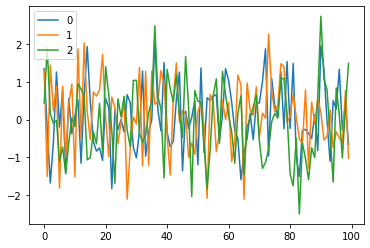

In [0]:
df1.plot()

##Data Structures

###Series

In [0]:
obj1 = pd.Series([4,5,-2], index=['a','b','c'])
print(obj1, obj1.values, obj1.index, obj1.dtypes, obj1.shape, type(obj1))

a    4
b    5
c   -2
dtype: int64 [ 4  5 -2] Index(['a', 'b', 'c'], dtype='object') int64 (3,) <class 'pandas.core.series.Series'>


###DataFrame

In [0]:
data = {'Name':['tonya','dana','stella','bett'],'Age':[34,30,29,40]}
df01 = pd.DataFrame(data, index=['add1','add2','add3','add4'])
df01.values, df01.index, df01.columns, df01.dtypes

(array([['tonya', 34],
        ['dana', 30],
        ['stella', 29],
        ['bett', 40]], dtype=object),
 Index(['add1', 'add2', 'add3', 'add4'], dtype='object'),
 Index(['Name', 'Age'], dtype='object'),
 Name    object
 Age      int64
 dtype: object)

In [0]:
df01.columns

Index(['Name', 'Age'], dtype='object')

##Get Data

#### basic grammer

In [0]:
data = pd.read_csv('./input.csv')

ParserError: ignored

In [0]:
data = pd.read_json('./input.json')

In [0]:
data

,ID,Name,Salary,StartDate,Dept
0,1,Rick,623.30,1/1/2012,IT
1,2,Dan,515.20,9/23/2013,Operations
2,3,Michelle,611.00,11/15/2014,IT
3,4,Ryan,729.00,5/11/2014,HR
4,5,Gary,843.25,3/27/2015,Finance
5,6,Nina,578.00,5/21/2013,IT
6,7,Simon,632.80,7/30/2013,Operations
7,8,Guru,722.50,6/17/2014,Finance


In [0]:
data1 = pd.read_excel('./input.xlsx')
data1

,id,name,zipcode
0,1,Rick,301224
1,2,Dan,341255
2,3,Tusar,297704
3,4,Ryan,216650
4,5,Gary,438700
5,6,Rasmi,665100
6,7,Pranab,341211
7,8,Guru,347480


In [0]:
data1.to_excel(r'./output.xlsx',index=True,header=True)

In [0]:
data1.info

<bound method DataFrame.info of    id    name  zipcode
0   1    Rick   301224
1   2     Dan   341255
2   3   Tusar   297704
3   4    Ryan   216650
4   5    Gary   438700
5   6   Rasmi   665100
6   7  Pranab   341211
7   8    Guru   347480>

In [0]:
with pd.ExcelFile('./input.xlsx') as xls:
  df2 = pd.read_excel(xls,'Sheet2')
  df3 = pd.read_excel(xls,'Sheet1')

In [0]:
df2

,id,name,salary,start_date,dept
0,1,Rick,623.30,2012-01-01,IT
1,2,Dan,515.20,2013-09-23,Operations
2,3,Tusar,611.00,2014-11-15,IT
3,4,Ryan,729.00,2014-05-11,HR
4,5,Gary,843.25,2015-03-27,Finance
5,6,Rasmi,578.00,2013-05-21,IT
6,7,Pranab,632.80,2013-07-30,Operations
7,8,Guru,722.50,2014-06-17,Finance


In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       8 non-null      int64 
 1   name     8 non-null      object
 2   zipcode  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [0]:
!pip install sqlalchemy

#### create_engine

- 엔진 변수를 만들어 sql 형식 데이터 테이블로 DB 임의생성
- sql 쿼리를 통해 데이터 호출

In [0]:
from sqlalchemy import create_engine

In [0]:
data = pd.read_json('./input.json')
engine = create_engine('sqlite:///:memory:')
data.to_sql('data_table',engine)

In [0]:
res1 = pd.read_sql_query('SELECT * FROM data_table',engine)
res2 = pd.read_sql_query('SELECT dept, sum(salary) FROM data_table group by dept',engine)

In [0]:
res1.info()
res1.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      8 non-null      int64  
 1   ID         8 non-null      int64  
 2   Name       8 non-null      object 
 3   Salary     8 non-null      float64
 4   StartDate  8 non-null      object 
 5   Dept       8 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 512.0+ bytes


,index,ID,Name,Salary,StartDate,Dept
count,8.00000,8.00000,8,8.000000,8,8
unique,NaN,NaN,8,NaN,8,4
top,NaN,NaN,Gary,NaN,5/21/2013,IT
freq,NaN,NaN,1,NaN,1,3
mean,3.50000,4.50000,NaN,656.881250,NaN,NaN
std,2.44949,2.44949,NaN,103.059463,NaN,NaN
min,0.00000,1.00000,NaN,515.200000,NaN,NaN
25%,1.75000,2.75000,NaN,602.750000,NaN,NaN
50%,3.50000,4.50000,NaN,628.050000,NaN,NaN
75%,5.25000,6.25000,NaN,724.125000,NaN,NaN


In [0]:
res2

,Dept,sum(salary)
0,Finance,1565.75
1,HR,729.00
2,IT,1812.30
3,Operations,1148.00


####Counter 함수

- 비정형 데이터를 가져올 때 사용
- 똑같은 단어 수를 세어주는 함수

In [0]:
from collections import Counter

In [0]:
with open(r'./sample_data/README.md') as f:
  p_dict = Counter(f.read().split());
p_dict

AttributeError: ignored

####TRY

In [0]:
#read all files
sample1 = pd.read_json('./sample_data/anscombe.json')
sample2 = pd.read_csv('./sample_data/california_housing_test.csv')
sample3 = pd.read_csv('./sample_data/california_housing_train.csv')
sample4 = pd.read_csv('./sample_data/mnist_test.csv')
sample5 = pd.read_csv('./sample_data/mnist_train_small.csv')

In [0]:
#sample1 anscombe information

print(sample1.info())
print(sample1.describe())
print(sample1.head())
print(sample1.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     int64  
 2   Y       44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB
None
               X          Y
count  44.000000  44.000000
mean    9.000000   7.500455
std     3.198837   1.959244
min     4.000000   3.100000
25%     7.000000   6.117500
50%     8.000000   7.520000
75%    11.000000   8.747500
max    19.000000  12.740000
  Series   X     Y
0      I  10  8.04
1      I   8  6.95
2      I  13  7.58
3      I   9  8.81
4      I  11  8.33
   Series   X      Y
39     IV   8   5.25
40     IV  19  12.50
41     IV   8   5.56
42     IV   8   7.91
43     IV   8   6.89


In [0]:
#sample2 california_housing_test information

print(sample2.info())
print(sample2.describe())
print(sample2.head())
print(sample2.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB
None
         longitude    latitude  ...  median_income  median_house_value
count  3000.000000  3000.00000  ...    3000.000000          3000.00000
mean   -119.589200    35.63539  ...       3.807272        205846.27500
std       1.994936     2.12967  ...       1.854512        113119.68747
min    -124.180000    32

In [0]:
#sample3 california_housing_train information

print(sample3.info())
print(sample3.describe())
print(sample3.head())
print(sample3.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
          longitude      latitude  ...  median_income  median_house_value
count  17000.000000  17000.000000  ...   17000.000000        17000.000000
mean    -119.562108     35.625225  ...       3.883578       207300.912353
std        2.005166      2.137340  ...       1.908157       115983.764387
min     -124

In [0]:
#sample4 mnist_test information

print(sample4.info())
print(sample4.describe())
print(sample4.head())
print(sample4.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB
None
                 7       0     0.1     0.2  ...   0.664   0.665   0.666   0.667
count  9999.000000  9999.0  9999.0  9999.0  ...  9999.0  9999.0  9999.0  9999.0
mean      4.443144     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
std       2.895897     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
min       0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
25%       2.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
50%       4.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
75%       7.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
max       9.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0

[8 rows x 785 columns]
   7  0  0.1  0.2  0.3  0.4  ...  0.662  0.663  0.664  0.665  0.666  0.667
0  2  0    0    0    0    0 

In [0]:
#sample5 mnist_train_small information

print(sample5.info())
print(sample5.describe())
print(sample5.head())
print(sample5.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB
None
                  6        0      0.1  ...    0.588    0.589    0.590
count  19999.000000  19999.0  19999.0  ...  19999.0  19999.0  19999.0
mean       4.470124      0.0      0.0  ...      0.0      0.0      0.0
std        2.892807      0.0      0.0  ...      0.0      0.0      0.0
min        0.000000      0.0      0.0  ...      0.0      0.0      0.0
25%        2.000000      0.0      0.0  ...      0.0      0.0      0.0
50%        4.000000      0.0      0.0  ...      0.0      0.0      0.0
75%        7.000000      0.0      0.0  ...      0.0      0.0      0.0
max        9.000000      0.0      0.0  ...      0.0      0.0      0.0

[8 rows x 785 columns]
   6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0  5  0    0    0    0    0  ...      0      0      0      0      0      0
1  7  0    0    0    0    0  ...      0 

##Series : index + values


In [0]:
data2 = {'kim':35000,'park':67000,'joon':12000,'choi':4000}
obj2 = pd.Series(data2)
obj2, obj2.dtype, obj2.shape, type(obj2)

(kim     35000
 park    67000
 joon    12000
 choi     4000
 dtype: int64, dtype('int64'), (4,), pandas.core.series.Series)

In [0]:
obj2.values, obj2.values.shape, obj2.index.shape, type(obj2.values)

(array([35000, 67000, 12000,  4000]), (4,), (4,), numpy.ndarray)

In [0]:
obj2.index.dtype

dtype('O')

In [0]:
obj2 * 2

kim      70000
park    134000
joon     24000
choi      8000
dtype: int64

####Series - slicing

In [0]:
pd_series01 = pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
pd_series01[:4],pd_series01[['c','a']]

(a    1
 b    2
 c    3
 d    4
 dtype: int64, c    3
 a    1
 dtype: int64)

In [0]:
#put MASK

print(obj1 > 4)
print(obj1[obj1 >4])

a    False
b     True
c    False
dtype: bool
b    5
dtype: int64


In [0]:
pd_series01[:3] = [9,8,7]
pd_series01[['a','c','b']]= [20,30,40]
pd_series01

a    20
b    40
c    30
d     4
e     5
dtype: int64

In [0]:
# 2 ways of deleting

#del - delete value eternally
del pd_series01['b']
print(pd_series01)

a    20
c    30
d     4
e     5
dtype: int64


In [0]:
#data.drop([index]) - if you want to apply this to the origin data, you need to allocate result to variable 
pd_series01.drop(['d','c'])

a    20
e     5
dtype: int64

##DataFrame : Series + Column Name

dataframe is concatenation of various series

In [0]:
data01 = {'one': pd.Series([1,2,3],index=['a','b','c']),
          'two' : pd.Series([1,2,3,4],index=['a','c','d','e'])}
pd_df05 = pd.DataFrame(data01)
pd_df05['one'], type(pd_df05['one'])

(a    1.0
 b    2.0
 c    3.0
 d    NaN
 e    NaN
 Name: one, dtype: float64, pandas.core.series.Series)

In [0]:
pd_df05[['one','two']]

,one,two
a,1.0,1.0
b,2.0,NaN
c,3.0,2.0
d,NaN,3.0
e,NaN,4.0


In [0]:
pd_sr06 = pd.Series([10,20,30],index=['a','e','f'])
pd_df05['three'] = pd_sr06
pd_df05['four'] = pd_df05['two']+ 4
pd_df05['five'] = np.array([10,20,30,40,50])
pd_df05['six'] = pd_df05['three']+pd_df05['one']

pd_df05

,one,two,three,four,five,six
a,1.0,1.0,10.0,5.0,10,11.0
b,2.0,NaN,NaN,NaN,20,NaN
c,3.0,2.0,NaN,6.0,30,NaN
d,NaN,3.0,NaN,7.0,40,NaN
e,NaN,4.0,20.0,8.0,50,NaN


In [0]:
del pd_df05['six']

In [0]:
pd_df05.pop('two')

a    1.0
b    NaN
c    2.0
d    3.0
e    4.0
Name: two, dtype: float64

In [0]:
pd_df05.drop(['three','five'],axis = 1)

,one,four
a,1.0,5.0
b,2.0,NaN
c,3.0,6.0
d,NaN,7.0
e,NaN,8.0


In [0]:
pd_df05.drop(['a','e'],axis = 0)

,one,three,four,five
b,2.0,NaN,NaN,20
c,3.0,NaN,6.0,30
d,NaN,NaN,7.0,40


###TRY DataFrame

In [0]:
#Raw Data

data00 = {
        'name':['choi','choi','choi','kim','park'],
        'years':[2013,2014,2015,2016,2017],
        'points':[1.5,1.7,3.6,2.4,2.9]
}

make DataFrame

In [0]:
import numpy as np
import pandas as pd

df01 = pd.DataFrame(data00,index=['one','two','three','four','five'])
df01

,name,years,points
one,choi,2013,1.5
two,choi,2014,1.7
three,choi,2015,3.6
four,kim,2016,2.4
five,park,2017,2.9


add Columns

In [0]:
#make Series for DataFrame columns

se01 = pd.Series([0.1,0.2,0.3,0.4,0.5], index=['one','two','three','four','five'] )
se02 = pd.Series([0,1,2,3,4], index=['one','two','three','four','five'])
se03 = pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])

In [0]:
#add Series to DataFrame

df01['penalty'] = se01
df01['zero'] = se02
df01['debt'] = se03
df01['net_points'] = df01['points'] - df01['penalty']
df01['high_points'] = df01['net_points'] > 2.0      # using MASK

df01

,name,years,points,penalty,zero,debt,net_points,high_points
one,choi,2013,1.5,0.1,0,NaN,1.4,False
two,choi,2014,1.7,0.2,1,-1.2,1.5,False
three,choi,2015,3.6,0.3,2,NaN,3.3,True
four,kim,2016,2.4,0.4,3,-1.5,2.0,False
five,park,2017,2.9,0.5,4,-1.7,2.4,True


###DataFrame - Slicing

In [0]:
df01.iloc[0:3,:]

,name,years,points,penalty,zero,debt,net_points,high_points
one,choi,2013,1.5,0.1,0,NaN,1.4,False
two,choi,2014,1.7,0.2,1,-1.2,1.5,False
three,choi,2015,3.6,0.3,2,NaN,3.3,True


In [0]:
df01.iloc[0:3,1:3]

,years,points
one,2013,1.5
two,2014,1.7
three,2015,3.6


In [0]:
df01.loc['two':'four',:]

,name,years,points,penalty,zero,debt,net_points,high_points
two,choi,2014,1.7,0.2,1,-1.2,1.5,False
three,choi,2015,3.6,0.3,2,NaN,3.3,True
four,kim,2016,2.4,0.4,3,-1.5,2.0,False


In [0]:
df01.loc[:,'years':'penalty']

,years,points,penalty
one,2013,1.5,0.1
two,2014,1.7,0.2
three,2015,3.6,0.3
four,2016,2.4,0.4
five,2017,2.9,0.5


In [0]:
#revise Row

##deleting Column
df01.drop(df01.loc[:,'points':'penalty'],axis=1)

##adding Column
df01.loc[:,'score'] = [1.5,1.7,3.6,2.4,2.9,3.1]

df01

,name,years,points,penalty,zero,debt,net_points,high_points,score
one,choi,2013.0,1.5,0.1,0.0,NaN,1.4,False,1.5
two,choi,2014.0,1.7,0.2,1.0,-1.2,1.5,False,1.7
three,choi,2015.0,3.6,0.3,2.0,NaN,3.3,True,3.6
four,kim,2016.0,2.4,0.4,3.0,-1.5,2.0,False,2.4
five,park,2017.0,2.9,0.5,4.0,-1.7,2.4,True,2.9
six,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1


In [0]:
#revise Row

##deleting Row
print(df01.drop(['four','five'],axis=0))

#adding Row
df01.loc['six',:] = ['park',2017,2.9,0.6,5.0,-1.3,3.0,True,3.1]

df01

       name   years  points  penalty  zero  debt  net_points high_points  score
one    choi  2013.0     1.5      0.1   0.0   NaN         1.4       False    1.5
two    choi  2014.0     1.7      0.2   1.0  -1.2         1.5       False    1.7
three  choi  2015.0     3.6      0.3   2.0   NaN         3.3        True    3.6
six     NaN     NaN     NaN      NaN   NaN   NaN         NaN         NaN    3.1


,name,years,points,penalty,zero,debt,net_points,high_points,score
one,choi,2013.0,1.5,0.1,0.0,NaN,1.4,False,1.5
two,choi,2014.0,1.7,0.2,1.0,-1.2,1.5,False,1.7
three,choi,2015.0,3.6,0.3,2.0,NaN,3.3,True,3.6
four,kim,2016.0,2.4,0.4,3.0,-1.5,2.0,False,2.4
five,park,2017.0,2.9,0.5,4.0,-1.7,2.4,True,2.9
six,park,2017.0,2.9,0.6,5.0,-1.3,3.0,True,3.1


In [0]:
#put MASK

df01['years'] > 2014, df01['name'] == 'choi'

(one      False
 two      False
 three     True
 four      True
 five      True
 six       True
 Name: years, dtype: bool, one       True
 two       True
 three     True
 four     False
 five     False
 six      False
 Name: name, dtype: bool)

In [0]:
#showing result by putting MASK

df01.loc[df01['name'] == 'choi',['years','net_points','zero']]

,years,net_points,zero
one,2013.0,1.4,0.0
two,2014.0,1.5,1.0
three,2015.0,3.3,2.0


In [0]:
#drop by MASK

df01.drop(df01.loc[df01['name'] == 'choi'].index,axis=0)

,name,years,points,penalty,zero,debt,net_points,high_points,score
four,kim,2016.0,2.4,0.4,3.0,-1.5,2.0,False,2.4
five,park,2017.0,2.9,0.5,4.0,-1.7,2.4,True,2.9
six,park,2017.0,2.9,0.6,5.0,-1.3,3.0,True,3.1
